In [ ]:
# pip install joypy - initial joypy install

In [1]:
# import libraries
import pandas as pd, matplotlib.pyplot as plt

In [ ]:
# make DataFrame from one of the 2 data files
first_dataset = 'data/movies_2010_to_2014_data.csv'
first_df = pd.read_csv(first_dataset)

In [ ]:
# check the result
first_df.head()

In [ ]:
# get column names for DataFrame
first_df.columns

In [ ]:
# rename first column to 'ry_rank' (for release year rank)
first_df.columns = ['ry_rank', 'name', 'rating', 'genre', 'gross', 'release_year']
first_df.columns

In [ ]:
# check the results
first_df.head()

In [ ]:
# make another DataFrame from the other data file and check the results
second_dataset = 'data/moviedf15_19data.csv'
second_df = pd.read_csv(second_dataset)
second_df.head()

In [ ]:
# get the column names of the new DataFrame
second_df.columns

In [ ]:
# rename the first column
second_df.columns = ['ry_rank', 'name', 'genre', 'gross', 'rating', 'release_year']

In [ ]:
# check the results
second_df.head()

In [ ]:
# pop the 'rating' column from the new DataFrame to move it
second_rating = second_df.pop('rating')

In [ ]:
# insert the 'rating' column in the desired position to align the columns of the two DataFrames
second_df.insert(2, 'rating', second_rating)

In [ ]:
# check the second DataFrame column alignment
second_df.head()

In [ ]:
# check the first DataFrame column alignment
first_df.head()

In [ ]:
# combine the first and second DataFrames into a new DataFrame 'full_df'
full_df = pd.concat([first_df, second_df])

In [ ]:
# check the results
full_df.head()

In [ ]:
# another results check
full_df.tail()

In [ ]:
# find primary_genre, identified as first element of genre info
list(full_df['genre'])[0].split(', ')[0]

In [ ]:
# make list of primary_genre info
primary_genre = [genre.split(', ')[0] for genre in full_df['genre']]

In [ ]:
# check the results
primary_genre

In [ ]:
# add new column for primary_genre to DataFrame
full_df['primary_genre'] = primary_genre

In [ ]:
# check the results
full_df.tail()

In [ ]:
# export combined data to csv file
full_df.to_csv(path_or_buf='data/combined_movie_data_2010_to_2019.csv')

In [2]:
full_df = pd.read_csv('data/combined_movie_data_2010_to_2019.csv')

In [3]:
genre_gross_df = full_df.groupby('primary_genre')['gross'].sum().sort_values(ascending=False)

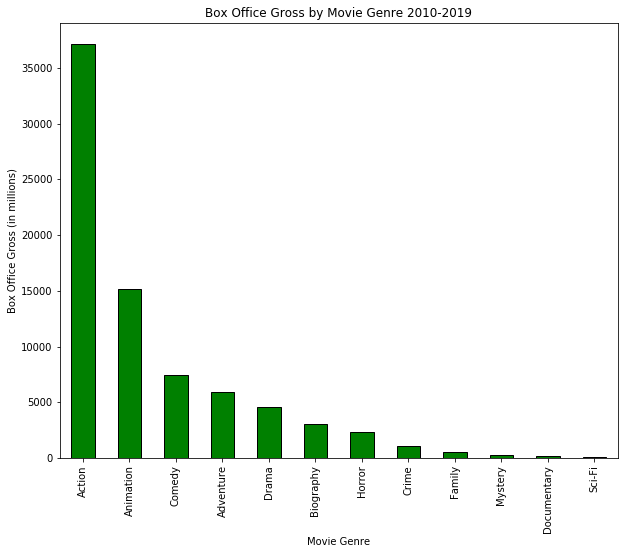

In [25]:
genre_gross_df.plot(kind='bar',
                    figsize=(10,8),
                    color='green',
                   edgecolor='black');
plt.xlabel('Movie Genre');
plt.ylabel('Box Office Gross (in millions)');
plt.title('Box Office Gross by Movie Genre 2010-2019');
plt.savefig(fname='images/gross_by_genre.png', format='png');

In [18]:
plt.savefig(fname='images/gross_by_genre.jpg', format='jpg')

<Figure size 432x288 with 0 Axes>

In [6]:
rating_gross_df = full_df.groupby('rating')['gross'].sum().sort_values(ascending=False)

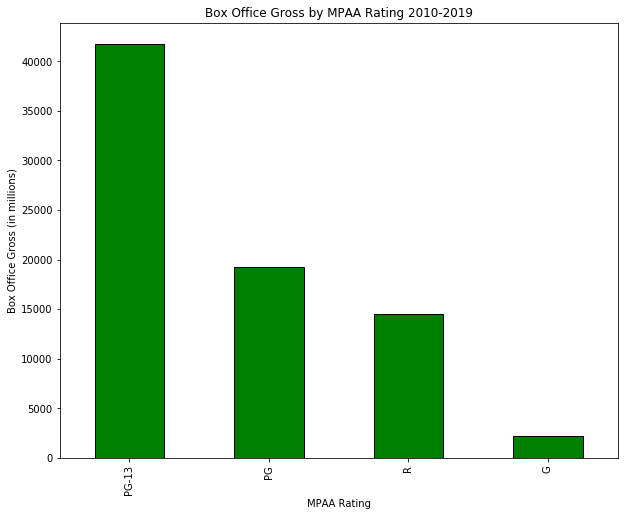

In [26]:
rating_gross_df.plot(kind='bar',
                    figsize=(10,8),
                    color='green',
                    edgecolor='black');
plt.title('Box Office Gross by MPAA Rating 2010-2019');
plt.xlabel('MPAA Rating');
plt.ylabel('Box Office Gross (in millions)');
plt.savefig(fname='images/gross_by_rating.png', format='png');

In [9]:
genre_rating_gross_df = full_df.groupby(['primary_genre', 'rating'])['gross'].sum().sort_values(ascending=False)

In [10]:
genre_rating_gross_df

primary_genre  rating
Action         PG-13     30652.87
Animation      PG        12955.16
Action         R          5235.29
Comedy         R          3460.09
               PG-13      3322.81
Adventure      PG         2747.59
               PG-13      2718.47
Drama          PG-13      2586.78
Animation      G          2099.29
Horror         R          1873.04
Biography      PG-13      1528.53
Drama          R          1417.04
Action         PG         1273.45
Biography      R           942.97
Crime          R           805.98
Comedy         PG          697.83
Biography      PG          559.58
Drama          PG          547.51
Family         PG          504.01
Horror         PG-13       489.21
Adventure      R           433.45
Crime          PG-13       277.57
Mystery        R           128.01
               PG-13       127.00
Documentary    R           117.22
Animation      R            97.69
Sci-Fi         PG-13        79.25
Documentary    G            73.01
Name: gross, dtype: float6

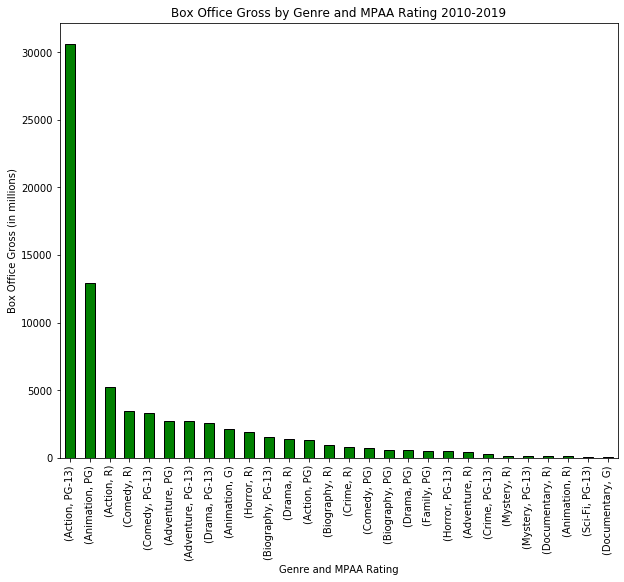

In [27]:
genre_rating_gross_df.plot(kind='bar',
                          figsize=(10,8),
                          color='green',
                          edgecolor='black');
plt.title('Box Office Gross by Genre and MPAA Rating 2010-2019')
plt.xlabel('Genre and MPAA Rating')
plt.ylabel('Box Office Gross (in millions)');
plt.savefig(fname='images/gross_by_genre_and_rating.png', format='png');

In [13]:
genre_rating_count_df = full_df.groupby(['primary_genre', 'rating'])['name'].count().sort_values(ascending=False)

In [14]:
genre_rating_count_df

primary_genre  rating
Action         PG-13     148
Animation      PG         70
Action         R          44
Comedy         PG-13      34
               R          32
Drama          PG-13      24
Adventure      PG         21
Horror         R          16
Biography      PG-13      14
Adventure      PG-13      12
Animation      G          10
Action         PG         10
Drama          R          10
Biography      R           9
Comedy         PG          8
Crime          R           7
Horror         PG-13       6
Biography      PG          5
Drama          PG          5
Adventure      R           5
Crime          PG-13       3
Mystery        R           1
Documentary    G           1
Animation      R           1
Documentary    R           1
Family         PG          1
Mystery        PG-13       1
Sci-Fi         PG-13       1
Name: name, dtype: int64

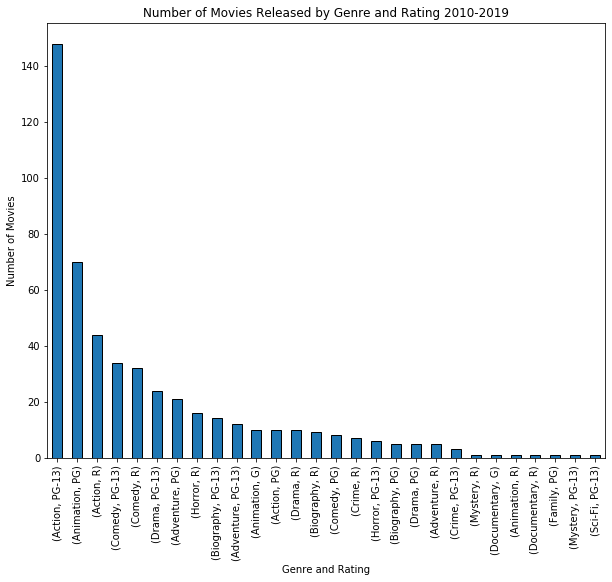

In [28]:
genre_rating_count_df.plot(kind='bar',
                           figsize=(10,8),
                          edgecolor='black');
plt.title('Number of Movies Released by Genre and Rating 2010-2019')
plt.xlabel('Genre and Rating')
plt.ylabel('Number of Movies');
plt.savefig('images/number_released_by_genre_and_rating.png', format='png');

In [ ]:
full_df.loc[full_df['primary_genre']=='Family']

In [ ]:
full_df.groupby(['primary_genre', 'rating']).size()

In [ ]:
joypy.joyplot(data=full_df, by='release_year', column='gross', figsize=(10,8), title='Box Office Gross Distribution Over Time');

In [ ]:
full_df.groupby('primary_genre')['gross'].median()

In [ ]:
df_recent = full_df.loc[full_df['release_year']==2018|2019]

In [ ]:
df_recent.groupby('primary_genre')['gross'].median()